In [1]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline
#%matplotlib

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# matplotlib에는 서로 다른 색상으로 텍스트를 그리는 기능이 없습니다. 이를 구현해 봅시다.
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    # 색상을 뒤집어서 가져옵니다.
    colors = list(reversed(colors))
    # 변환(transformation)을 설정합니다.
    t = ax.transData
    # 캔버스를 가져옵니다.
    canvas = ax.figure.canvas

    # 텍스트를 역순으로 분리합니다.
    for i, line in enumerate(reversed(text.split('\n'))):
        # 줄 바꿈을 기준으로 텍스트를 분리합니다.
        strings = line.split('||')
        # 텍스트와 색상을 이어주어 순서대로 반복합니다.
        for s, c in zip(strings, colors[i]):
            # 텍스트를 생성하고 색상을 지정합니다.
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            # 캔버스에 그리기 작업을 수행합니다.
            text.draw(canvas.get_renderer())
            # 텍스트의 크기를 가져옵니다.
            ex = text.get_window_extent()
            # 변환을 조정합니다.
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        # 줄 간격을 설정합니다.
        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')


In [4]:
# 플롯 폰트 패밀리를 Arial로 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 수학 텍스트 굵게 및 이탤릭체 폰트 패밀리를 Arial로 설정
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'NanumGothic:bold'
matplotlib.rcParams['mathtext.it'] = 'NanumGothic:italic'

In [7]:
# 설문 응답
X = ['지루함', '별로 좋지 않음', '보통', '좀 관심\n 있음', '흥미로움']
Y = [11, 5, 40, 25, 19]  # 프로그램 이전 응답 분포
Z = [12, 6, 14, 30, 38]  # 프로그램 이후 응답 분포


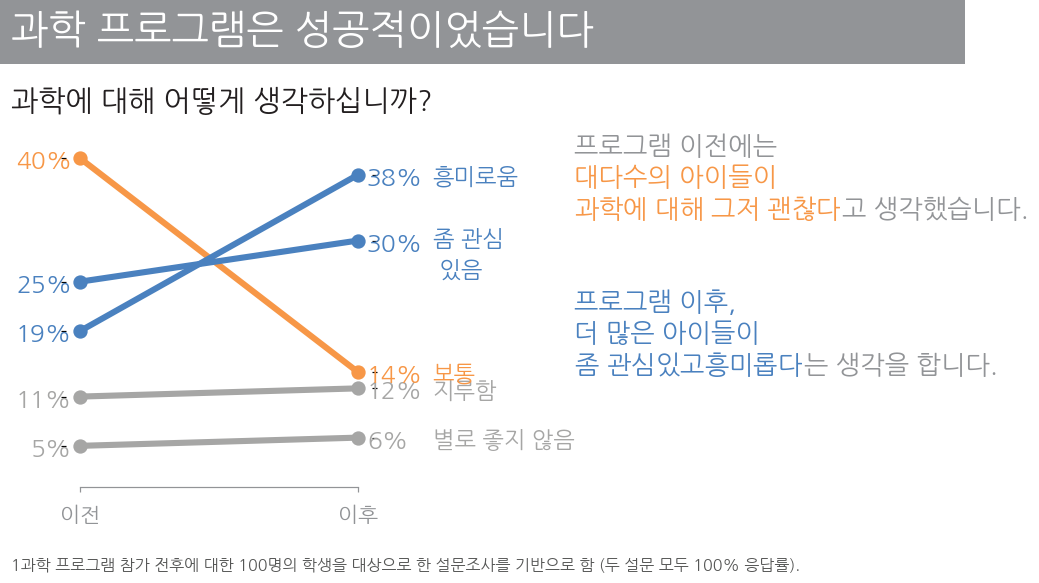

In [8]:
# 새로운 그림 생성
fig, ax1 = plt.subplots(figsize=(7.6, 5.5),  # 가로, 세로 (인치 단위)
                        dpi=110)             # 그림 해상도

# 그림 레이아웃 조정
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

# matplotlib에는 슬로프 그래프를 그리는 도구가 없으므로
# 이중 축 접근을 사용합니다
# y축의 한계와 함께 x축을 공유하는 twin Axes 생성
ax2 = ax1.twinx()

ax2.set_ylim([0, 42])
ax1.set_ylim([0, 42])

# 응답에 대한 색상 할당
C = [GRAY8, GRAY8, ORANGE1, BLUE2, BLUE2]
# 원 모양 마커와 함께 슬로프 그래프 선 그리기
for i in range(5):
    # 원 그리기
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    # 선 그리기
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    # 라벨 추가
    plt.text(1.27,
             Z[i] + (-1, -4.4)[i == 3],  # 세 번째 라벨은 아래로 더 많이 이동
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

# 눈금, 눈금 레이블, 그리드 선의 모양 변경
# (왼쪽과 오른쪽 눈금은 표시하지 않음)
ax1.tick_params(left='off')
ax2.tick_params(right='off')

# 축 객체의 속성 설정
plt.setp(ax1,
         xticks=[0, 1],  # 0과 1의 두 개의 x-눈금만 사용
         xticklabels=['이전', '이후'],  # 텍스트 라벨 포함
         yticks=Y,  # 모든 이전 응답을 위한 눈금 %
         yticklabels=[str(v) + '%' for v in Y])  # n% 라벨 포함

# 보조 축 객체의 속성 설정
plt.setp(ax2,
         yticks=Z,  # 모든 이후 응답을 위한 눈금 %
         yticklabels=[str(v) + '%' for v in Z])  # n% 라벨 포함

# 차트 테두리 제거
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# 양 축의 눈금 레이블 모양 설정
for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        # y 눈금 레이블을 이동시키기 위해 변환 사용
        # 왼쪽 y 눈금은 약간 오른쪽으로, 오른쪽 눈금은 약간 왼쪽으로
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

# x 눈금 레이블 모양 설정
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    # x 눈금 레이블을 약간 아래로 이동시키기 위해 변환 사용
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# x 눈금 색상 변경
ax1.tick_params(axis='x', colors=GRAY7)
# 하단 테두리 추가 및 회색으로 설정
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

# 플롯에 제목 추가
plt.text(-0.25, 54.3,
         '과학 프로그램은 성공적이었습니다' + ' ' * 32,
         fontsize=26,
         color='white',
         # 텍스트 주변에 사각형 상자 추가하여 배경색 설정
         bbox={'facecolor': GRAY7,  # 배경색
               'pad': 10,  # 여백 추가
               'edgecolor': 'none'})  # 테두리 없음

# 설문 질문 추가
plt.text(-0.25, 46, '과학에 대해 어떻게 생각하십니까?', fontsize=19, 
         color=GRAY1)

# 데이터 출처를 포함한 각주 추가
plt.text(-0.25, -10,
         '1과학 프로그램 참가 전후에 대한 100명의 학생을 대상으로 한 설문조사를 기반으로 함 '
         '(두 설문 모두 100% 응답률).',
         fontsize=10.5,
         color=GRAY3)

# 이전 텍스트 노트 추가, 몇 개의 단어는 오렌지색으로 강조됩니다
rainbow_text(1.78, 33,
             '프로그램 이전에는\n'
             '대다수의 아이들이\n'
             '과학에 대해 그저 $\\mathit{괜찮다}$||고 생각했습니다.',
             [[GRAY7], [ORANGE1], [ORANGE1, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

# 이후 텍스트 노트 추가, 몇 개의 단어는 파란색으로 강조됩니다
rainbow_text(1.78, 14,
             '프로그램 이후,\n'
             '더 많은 아이들이\n'
             '$\\it{좀\ 관심있고}$'
             '$\\it{흥미롭다}$||는 생각을 합니다.',
             [[GRAY7], [BLUE2], [BLUE2], [BLUE2, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)
